#model 


In [2]:
print("model runing")

model runing


In [23]:
import pandas as pd

##LOAD THE DATA

In [24]:
data = pd.read_csv('amazon.csv')

In [25]:
data.shape

(19996, 2)

In [26]:
import nltk
import spacy
from nltk.corpus import stopwords

In [27]:
import numpy as np
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import re

# Download necessary NLTK resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

class HybridSentimentAnalyzer:
    def __init__(self):
        # Initialize preprocessing tools
        self.stop_words = set(stopwords.words('english'))
        self.lemmatizer = WordNetLemmatizer()
        
    def preprocess_text(self, text):
        # Lowercasing
        text = text.lower()
        
        # Remove HTML tags
        text = re.sub(r'<.*?>', '', text)
        
        # Tokenization
        tokens = word_tokenize(text)
        
        # Stop word removal and lemmatization
        cleaned_tokens = [
            self.lemmatizer.lemmatize(token) 
            for token in tokens 
            if token.isalnum() and token not in self.stop_words
        ]
        
        return ' '.join(cleaned_tokens)
    
    def train_model(self, X, y):
        # Preprocess the text data
        X_preprocessed = X.apply(self.preprocess_text)
        
        # TF-IDF Vectorization (text representation)
        vectorizer = TfidfVectorizer(max_features=5000)
        X_vectorized = vectorizer.fit_transform(X_preprocessed)
        
        # Label Encoding
        le = LabelEncoder()
        y_encoded = le.fit_transform(y)
        
        # Split the data
        X_train, X_test, y_train, y_test = train_test_split(
            X_vectorized, y_encoded, test_size=0.2, random_state=42
        )
        
        # Train Random Forest Classifier (Hybrid approach)
        rf_classifier = RandomForestClassifier(
            n_estimators=100, 
            random_state=42, 
            n_jobs=-1
        )
        rf_classifier.fit(X_train, y_train)
        
        # Predictions and Evaluation
        y_pred = rf_classifier.predict(X_test)
        
        print("Classification Report:")
        print(classification_report(y_test, y_pred))
        
        print("\nConfusion Matrix:")
        print(confusion_matrix(y_test, y_pred))
        
        return {
            'vectorizer': vectorizer,
            'classifier': rf_classifier,
            'label_encoder': le
        }
    
    def predict(self, texts, model_components):
        # Preprocess input texts
        preprocessed_texts = [self.preprocess_text(text) for text in texts]
        
        # Vectorize texts
        X_vectorized = model_components['vectorizer'].transform(preprocessed_texts)
        
        # Predict
        predictions = model_components['classifier'].predict(X_vectorized)
        
        # Decode labels
        decoded_predictions = model_components['label_encoder'].inverse_transform(predictions)
        
        return decoded_predictions

# Main execution
def main():
    # Load your dataset
    df = data # Replace with your actual data loading method
    
    # Assuming first column is text, second is sentiment
    X = df.iloc[:, 0]  # Customer feedback
    y = df.iloc[:, 1]  # Sentiment labels
    
    # Initialize and train the hybrid model
    analyzer = HybridSentimentAnalyzer()
    model_components = analyzer.train_model(X, y)
    
    # Example prediction
    sample_texts = [
        "This product is amazing!",
        "I'm very disappointed with the service."
    ]
    predictions = analyzer.predict(sample_texts, model_components)
    
    for text, pred in zip(sample_texts, predictions):
        print(f"Text: {text} | Predicted Sentiment: {pred}")

if __name__ == "__main__":
    main()

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\MSI\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\MSI\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\MSI\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.56      0.67       978
           1       0.87      0.97      0.92      3022

    accuracy                           0.87      4000
   macro avg       0.86      0.76      0.80      4000
weighted avg       0.86      0.87      0.86      4000


Confusion Matrix:
[[ 549  429]
 [ 103 2919]]
Text: This product is amazing! | Predicted Sentiment: 0
Text: I'm very disappointed with the service. | Predicted Sentiment: 0


In [28]:

# Ensure nltk and spacy resources are downloaded
nltk.download('stopwords')
nltk.download('punkt')
nlp = spacy.load('en_core_web_sm')

# Sample feedback data
# sentences = [
#     "The product quality is excellent but quite expensive.",
#     "This app crashes frequently, which is very annoying.",
#     "I had a great experience with customer service!",
#     "Battery life is decent, but the charging time is too long.",
#     "I'm not very happy with the performance.",
#     "Amazing value for the price! Works really well.",
#     "Shipping was fast, but packaging was damaged.",
#     "The interface is outdated and difficult to navigate.",
#     "Good support, but response time could be faster.",
#     "High quality, but it produces too much noise."
# ]

sentences = data.iloc[:, 0]

# Define stop words
stop_words = set(stopwords.words('english'))

# Preprocess each sentence
processed_sentences = []
for sentence in sentences:
    # Step 1: Lowercasing
    sentence = sentence.lower()

    # Step 2: Tokenization and Stop Word Removal
    tokens = nltk.word_tokenize(sentence)
    tokens = [word for word in tokens if word.isalnum() and word not in stop_words]

    # Step 3: Lemmatization
    lemmatized_tokens = [token.lemma_ for token in nlp(" ".join(tokens))]

    # Append processed tokens as a sentence
    processed_sentences.append(" ".join(lemmatized_tokens))

# Show processed sentences
for i, sent in enumerate(processed_sentences, 1):
    print(f"{i}: {sent}")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\MSI\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\MSI\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


1: good app acorde bunch people agree bomb egg pig tnt king pig realustic stuff
2: pretty good version game free lot different level play kid enjoy lot
3: really bunch level find golden egg super fun
4: silly game frustrate lot fun definitely recommend fun time
5: terrific game pad hrs fun grandkid love great entertainment wait long line
6: entertaining game smart play guess like easy fun game suppose warn game highly addictive
7: awesome need wi ti play trust really fun addicting like 100 level even free waste money expensive one mean seriously get app
8: awesome bet one even read review know game good need
9: basicly free version ad actually awesome addict free time really reccomend
10: far well free app available anywhere help pass time nothing else would pass one ps hate 20 word minimum
11: definitely great get teach trick figure configuration tough beat particularly care spend 45 minute complete level
12: fun time consume work great kindle fire really like game btother
13: good li

In [29]:
from sklearn.feature_extraction.text import CountVectorizer
# Initialize CountVectorizer (BoW)
vectorizer = CountVectorizer()
bow_matrix = vectorizer.fit_transform(processed_sentences)

# Display BoW matrix
print("Bag of Words Matrix:\n", bow_matrix.toarray())
print("Feature Names:\n", vectorizer.get_feature_names_out())

Bag of Words Matrix:
 [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
Feature Names:
 ['00' '007' '02' ... 'zzz' 'zzzz' 'zzzzz']


In [30]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(processed_sentences)

# Display TF-IDF matrix
print("TF-IDF Matrix:\n", tfidf_matrix.toarray())
print("Feature Names:\n", tfidf_vectorizer.get_feature_names_out())

TF-IDF Matrix:
 [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
Feature Names:
 ['00' '007' '02' ... 'zzz' 'zzzz' 'zzzzz']


In [31]:
import gensim.downloader as api
import numpy as np

# Load GloVe word vectors
glove_vectors = api.load("glove-wiki-gigaword-100")  # 100-dimensional embeddings

# Function to get the embedding for a sentence
def get_sentence_embedding(sentence):
    words = sentence.split()
    embeddings = [glove_vectors[word] for word in words if word in glove_vectors]
    if embeddings:
        return np.mean(embeddings, axis=0)  # Average of word embeddings
    else:
        return np.zeros(100)  # Return zero vector if no embeddings are found

# Apply to all sentences
embedding_matrix = np.array([get_sentence_embedding(sentence) for sentence in processed_sentences])

print("Word Embedding Matrix:\n", embedding_matrix)

Word Embedding Matrix:
 [[-0.04756432  0.32634166  0.22722024 ... -0.23734327  0.47036543
   0.06282414]
 [-0.020854    0.28287232  0.51775521 ... -0.16239876  0.51995099
   0.37506828]
 [-0.08384651  0.27526364  0.39156127 ... -0.19855313  0.36833936
   0.35791403]
 ...
 [-0.149711    0.27790657  0.48280621 ... -0.21712655  0.57806545
   0.41298249]
 [-0.03264833  0.23790149  0.39045447 ... -0.38236427  0.38782379
   0.34850717]
 [-0.02164012  0.28943756  0.33823293 ... -0.25332001  0.54594892
   0.0131931 ]]


In [32]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

labels = data.iloc[:, 1]

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(sentences, labels, test_size=0.3, random_state=42)

# Feature extraction using TF-IDF
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Train a logistic regression model
model = LogisticRegression()
model.fit(X_train_tfidf, y_train)

# Predict and evaluate
y_pred = model.predict(X_test_tfidf)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.88      0.67      0.76      1456
           1       0.90      0.97      0.94      4543

    accuracy                           0.90      5999
   macro avg       0.89      0.82      0.85      5999
weighted avg       0.90      0.90      0.89      5999



In [33]:
from nltk.sentiment import SentimentIntensityAnalyzer
import nltk

# Ensure nltk resources are downloaded
nltk.download('vader_lexicon')

# Initialize VADER sentiment intensity analyzer
sia = SentimentIntensityAnalyzer()

# Analyze each sentence
for sentence in sentences:
    score = sia.polarity_scores(sentence)
    compound_score = score['compound']
    sentiment = "positive" if compound_score >= 0.05 else "negative" if compound_score <= -0.05 else "neutral"
    print(f"Sentence: {sentence}")
    print(f"Sentiment: {sentiment}, Score: {compound_score}")

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\MSI\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


Sentence: This is  the best apps acording to a bunch of people and I agree it has bombs eggs pigs TNT king pigs and realustic stuff
Sentiment: positive, Score: 0.7717
Sentence: This is a pretty good version of the game for being free. There are LOTS of different levels to play. My kids enjoy it a lot too.
Sentiment: positive, Score: 0.9325
Sentence: this is a really . there are a bunch of levels and you can find golden eggs. super fun.
Sentiment: positive, Score: 0.802
Sentence: This is a silly game and can be frustrating, but lots of fun and definitely recommend just as a fun time.
Sentiment: positive, Score: 0.9413
Sentence: This is a terrific game on any pad. Hrs of fun.  My grandkids love it. Great entertainment when waiting in long lines
Sentiment: positive, Score: 0.9552
Sentence: This is a very entertaining game!  You don't have to be smart to play it.  I guess that's why I like it...it's easy and fun and that's what games are suppose to be.  Be warned: this game is highly addic

In [17]:
pip install matplotlib

  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
   ---------------------------------------- 0.0/7.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/7.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/7.8 MB ? eta -:--:--
   -- ------------------------------------- 0.5/7.8 MB 2.8 MB/s eta 0:00:03
   ---- ----------------------------------- 0.8/7.8 MB 1.7 MB/s eta 0:00:05
   ----- ---------------------------------- 1.0/7.8 MB 2.1 MB/s eta 0:00:04
   --------- ------------------------------ 1.8/7.8 MB 2.1 MB/s eta 0:00:03
   ------------- -------------------------- 2.6/7.8 MB 2.5 MB/s eta 0:00:03
   ----------------- ---------------------- 3.4/7.8 MB 2.7 MB/s eta 0:00:02
   --------------------- ------------------ 4.2/7.8 MB 3.0 MB/s eta 0:00:02
   ------------------------- -------------- 5.0/7.8 MB 3.0 MB/s eta 0:00:01
   ------------------------------ --------- 6.0/7.8 MB 3.2 MB/s eta 0:00:01
   ---------------------------------- ----- 6

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from nltk.sentiment import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt


# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(sentences, labels, test_size=0.3, random_state=42)

# Feature extraction using TF-IDF for ML model
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Train a Logistic Regression model
ml_model = LogisticRegression()
ml_model.fit(X_train_tfidf, y_train)

# Predict and evaluate
y_pred_ml = ml_model.predict(X_test_tfidf)
ml_accuracy = accuracy_score(y_test, y_pred_ml)
ml_precision = precision_score(y_test, y_pred_ml, average='weighted')
ml_recall = recall_score(y_test, y_pred_ml, average='weighted')
ml_f1 = f1_score(y_test, y_pred_ml, average='weighted')

In [35]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from nltk.sentiment import SentimentIntensityAnalyzer
import nltk


  # Replace with your actual dataset file
reviews = data['Text']  # Adjust column name as per your dataset
labels = data['label']  # Adjust column name as per your dataset (1/0)

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(reviews, labels, test_size=0.3, random_state=42)

# Initialize rule-based sentiment analyzer
sia = SentimentIntensityAnalyzer()

# Define a rule-based preprocessing function
def preprocess_with_rules(review):
    # Analyze sentiment using VADER
    sentiment_scores = sia.polarity_scores(review)
    # Add custom rules for negations or specific words
    if sentiment_scores['compound'] >= 0.05:
        return 1  # Positive
    elif sentiment_scores['compound'] <= -0.05:
        return 0  # Negative
    else:
        return -1  # Neutral or undecided (optional)

# Apply rule-based preprocessing
rule_based_labels = X_train.apply(preprocess_with_rules)

# Filter out neutral/undecided if needed
valid_indices = rule_based_labels != -1
X_train_filtered = X_train[valid_indices]
y_train_filtered = y_train[valid_indices]

# TF-IDF feature extraction for ML model
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train_filtered)
X_test_tfidf = vectorizer.transform(X_test)

# Train a machine learning model
ml_model = LogisticRegression()
ml_model.fit(X_train_tfidf, y_train_filtered)

# Predict and evaluate
y_pred_ml = ml_model.predict(X_test_tfidf)

# Hybrid evaluation metrics
accuracy = accuracy_score(y_test, y_pred_ml)
precision = precision_score(y_test, y_pred_ml, average='weighted')
recall = recall_score(y_test, y_pred_ml, average='weighted')
f1 = f1_score(y_test, y_pred_ml, average='weighted')

# Output results
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")


Accuracy: 0.8948158026337723
Precision: 0.8940087780672856
Recall: 0.8948158026337723
F1 Score: 0.8889783173305745


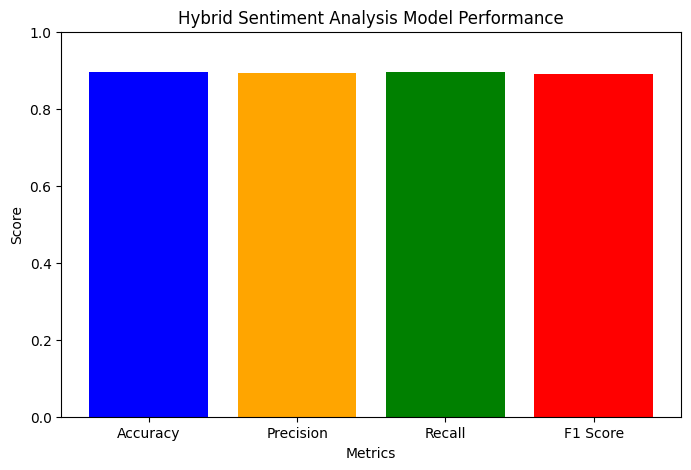

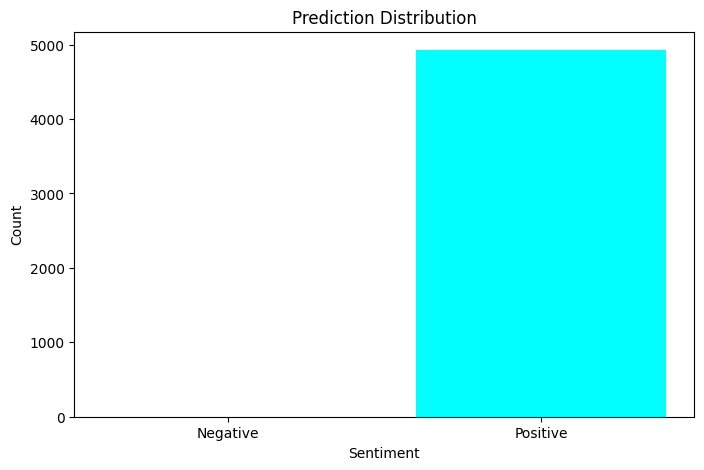

In [36]:
# Plot metrics
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
values = [accuracy, precision, recall, f1]

plt.figure(figsize=(8, 5))
plt.bar(metrics, values, color=['blue', 'orange', 'green', 'red'])
plt.ylim(0, 1)
plt.title('Hybrid Sentiment Analysis Model Performance')
plt.xlabel('Metrics')
plt.ylabel('Score')
plt.show()

# Plot prediction distribution
unique, counts = pd.Series(y_pred_ml).value_counts().sort_index().items()
labels = ['Negative', 'Positive']  # Adjust according to your label encoding

plt.figure(figsize=(8, 5))
plt.bar(labels, counts, color=['purple', 'cyan'])
plt.title('Prediction Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

#ML base

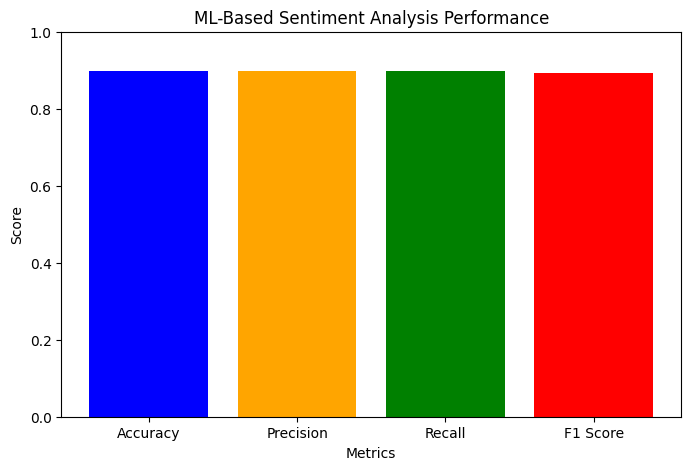

In [37]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt

# Load dataset
data = pd.read_csv("amazon.csv")  # Replace with your actual dataset file
reviews = data['Text']  # Adjust column name as per your dataset
labels = data['label']  # Adjust column name as per your dataset (1/0)

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(reviews, labels, test_size=0.3, random_state=42)

# TF-IDF feature extraction
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Train a machine learning model
ml_model = LogisticRegression()
ml_model.fit(X_train_tfidf, y_train)

# Predict and evaluate
y_pred_ml = ml_model.predict(X_test_tfidf)
ml_accuracy = accuracy_score(y_test, y_pred_ml)
ml_precision = precision_score(y_test, y_pred_ml, average='weighted')
ml_recall = recall_score(y_test, y_pred_ml, average='weighted')
ml_f1 = f1_score(y_test, y_pred_ml, average='weighted')

# Plot metrics
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
values = [ml_accuracy, ml_precision, ml_recall, ml_f1]

plt.figure(figsize=(8, 5))
plt.bar(metrics, values, color=['blue', 'orange', 'green', 'red'])
plt.ylim(0, 1)
plt.title('ML-Based Sentiment Analysis Performance')
plt.xlabel('Metrics')
plt.ylabel('Score')
plt.show()


#rule base

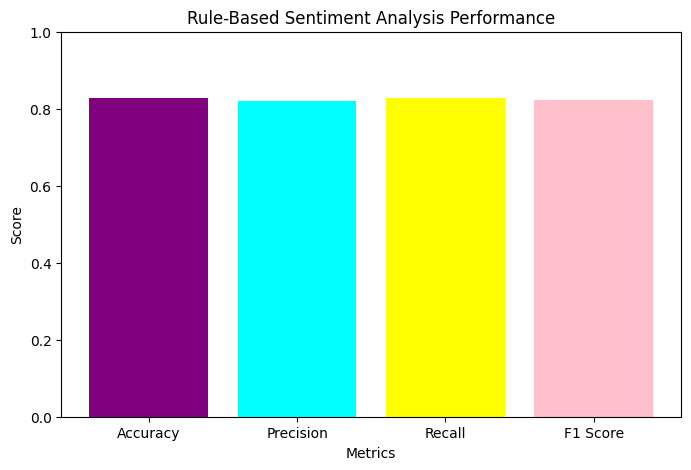

In [38]:
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer


# Initialize rule-based sentiment analyzer
sia = SentimentIntensityAnalyzer()

# Define a rule-based function
def preprocess_with_rules(review):
    sentiment_scores = sia.polarity_scores(review)
    if sentiment_scores['compound'] >= 0.05:
        return 1  # Positive
    elif sentiment_scores['compound'] <= -0.05:
        return 0  # Negative
    else:
        return -1  # Neutral or undecided

# Apply rule-based sentiment analysis
rule_based_preds = X_test.apply(preprocess_with_rules)

# Remove neutral predictions for evaluation
valid_indices = rule_based_preds != -1
filtered_preds = rule_based_preds[valid_indices]
filtered_actual = y_test[valid_indices]

# Evaluate rule-based model
rule_accuracy = accuracy_score(filtered_actual, filtered_preds)
rule_precision = precision_score(filtered_actual, filtered_preds, average='weighted')
rule_recall = recall_score(filtered_actual, filtered_preds, average='weighted')
rule_f1 = f1_score(filtered_actual, filtered_preds, average='weighted')

# Plot metrics
rule_values = [rule_accuracy, rule_precision, rule_recall, rule_f1]

plt.figure(figsize=(8, 5))
plt.bar(metrics, rule_values, color=['purple', 'cyan', 'yellow', 'pink'])
plt.ylim(0, 1)
plt.title('Rule-Based Sentiment Analysis Performance')
plt.xlabel('Metrics')
plt.ylabel('Score')
plt.show()


#hybrid 

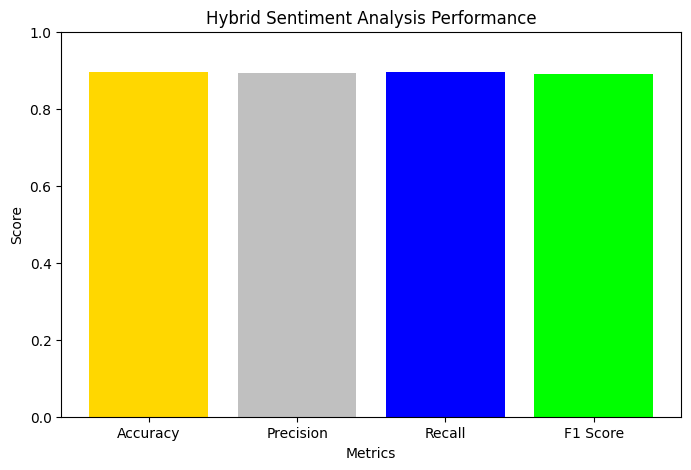

In [39]:
# Rule-based preprocessing on training data
rule_based_labels = X_train.apply(preprocess_with_rules)

# Filter out neutral/undecided from training data
valid_indices = rule_based_labels != -1
X_train_filtered = X_train[valid_indices]
y_train_filtered = y_train[valid_indices]

# TF-IDF feature extraction
X_train_tfidf = vectorizer.fit_transform(X_train_filtered)
X_test_tfidf = vectorizer.transform(X_test)

# Train ML model on filtered data
hybrid_model = LogisticRegression()
hybrid_model.fit(X_train_tfidf, y_train_filtered)

# Predict and evaluate hybrid model
y_pred_hybrid = hybrid_model.predict(X_test_tfidf)
hybrid_accuracy = accuracy_score(y_test, y_pred_hybrid)
hybrid_precision = precision_score(y_test, y_pred_hybrid, average='weighted')
hybrid_recall = recall_score(y_test, y_pred_hybrid, average='weighted')
hybrid_f1 = f1_score(y_test, y_pred_hybrid, average='weighted')

# Plot metrics
hybrid_values = [hybrid_accuracy, hybrid_precision, hybrid_recall, hybrid_f1]

plt.figure(figsize=(8, 5))
plt.bar(metrics, hybrid_values, color=['gold', 'silver', 'blue', 'lime'])
plt.ylim(0, 1)
plt.title('Hybrid Sentiment Analysis Performance')
plt.xlabel('Metrics')
plt.ylabel('Score')
plt.show()


#compare visualize

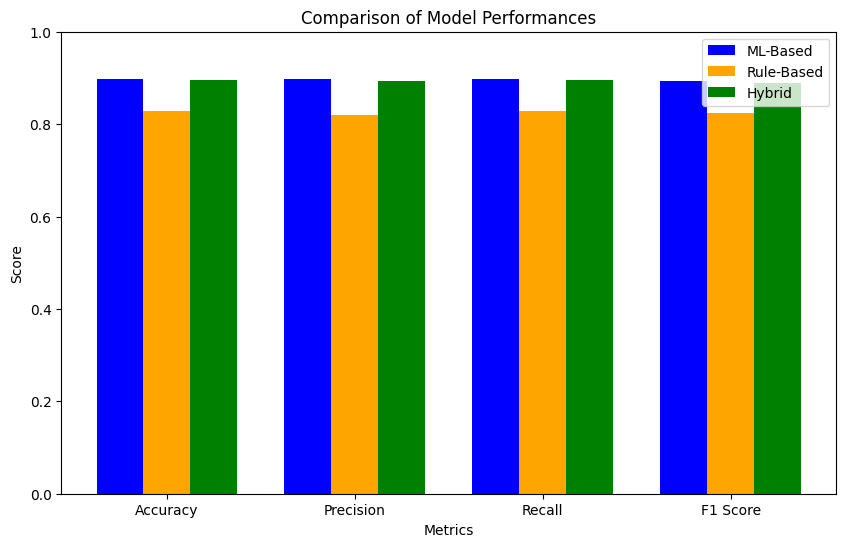

In [40]:
# ==========================
# Visualization: Comparison of Models
# ==========================

# Metrics comparison
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
ml_values = [ml_accuracy, ml_precision, ml_recall, ml_f1]
rule_values = [rule_accuracy, rule_precision, rule_recall, rule_f1]
hybrid_values = [hybrid_accuracy, hybrid_precision, hybrid_recall, hybrid_f1]

# Plot comparison
plt.figure(figsize=(10, 6))
bar_width = 0.25
x = range(len(metrics))

plt.bar(x, ml_values, width=bar_width, label='ML-Based', color='blue')
plt.bar([p + bar_width for p in x], rule_values, width=bar_width, label='Rule-Based', color='orange')
plt.bar([p + 2 * bar_width for p in x], hybrid_values, width=bar_width, label='Hybrid', color='green')

plt.xticks([p + bar_width for p in x], metrics)
plt.ylim(0, 1)
plt.title('Comparison of Model Performances')
plt.xlabel('Metrics')
plt.ylabel('Score')
plt.legend()
plt.show()

# new Hybrid model 

vectorizer = TfidfVectorizer(
    max_features=10000, # Increase the vocabulary size
    ngram_range=(1, 2), # Include bigrams for context
    stop_words='english', # Remove common stopwords
    min_df=2, # Ignore terms with very low frequency
    max_df=0.9 # Ignore very frequent terms
)


In [11]:
vectorizer = TfidfVectorizer(
    max_features=10000, # Increase the vocabulary size
    ngram_range=(1, 2), # Include bigrams for context
    stop_words='english', # Remove common stopwords
    min_df=2, # Ignore terms with very low frequency
    max_df=0.9 # Ignore very frequent terms
)

In [3]:
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest, f_classif

In [4]:
vectorizer = TfidfVectorizer(
    max_features=10000, # Increase the vocabulary size
    ngram_range=(1, 2), # Include bigrams for context
    stop_words='english', # Remove common stopwords
    min_df=2, # Ignore terms with very low frequency
    max_df=0.9 # Ignore very frequent terms
)


In [6]:
from sklearn.linear_model import LogisticRegression


hybrid_model = LogisticRegression(C=1, penalty='l2', solver='liblinear')


In [15]:
def preprocess_with_rules(review):
    sentiment_scores = sia.polarity_scores(review)
    # Handle specific edge cases with keywords
    if "not good" in review or "not satisfied" in review:
        return 0  # Negative
    if "awesome" in review or "highly recommend" in review:
        return 1  # Positive
    
    if sentiment_scores['compound'] >= 0.05:
        return 1  # Positive
    elif sentiment_scores['compound'] <= -0.05:
        return 0  # Negative
    else:
        return -1  # Neutral


In [16]:
vectorizer = TfidfVectorizer(
    max_features=10000,  # Increase the vocabulary size
    ngram_range=(1, 2),  # Consider bi-grams as well as uni-grams
    stop_words='english',  # Remove common stop words
    min_df=3,  # Ignore very rare words
    max_df=0.8  # Ignore overly common words
)


In [17]:
hybrid_model = LogisticRegression(class_weight='balanced')


In [42]:
# Combine predictions from ML and rule-based models
def hybrid_ensemble(ml_pred, rule_pred):
    final_pred = []
    for ml, rule in zip(ml_pred, rule_pred):
        if rule != -1:  # Give preference to rule-based predictions
            final_pred.append(rule)
        else:
            final_pred.append(ml)  # Fall back to ML prediction
    return final_pred

y_pred_hybrid = hybrid_ensemble(y_pred_ml, rule_based_preds)


In [43]:
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest, f_classif

def enhance_features(text_series):
    """Extract additional features from text"""
    features = []
    for text in text_series:
        # Text length
        length = len(text)
        
        # Number of capital letters
        capitals = sum(1 for c in text if c.isupper())
        
        # Count of punctuation marks
        punctuation = sum(1 for c in text if c in '!?.,;:')
        
        # Count of emotional words (expand this list based on your domain)
        emotional_words = ['good', 'bad', 'great', 'terrible', 'awesome', 'horrible']
        emotion_count = sum(1 for word in text.lower().split() if word in emotional_words)
        
        features.append([length, capitals, punctuation, emotion_count])
    return np.array(features)

def preprocess_with_advanced_rules(text):
    """Enhanced rule-based preprocessing"""
    # Stronger positive indicators
    strong_positive = ['excellent', 'amazing', 'outstanding', 'perfect', 'brilliant']
    # Stronger negative indicators
    strong_negative = ['terrible', 'horrible', 'awful', 'worst', 'poor']
    
    text_lower = text.lower()
    
    # Check for strong indicators
    if any(word in text_lower for word in strong_positive):
        return 1
    if any(word in text_lower for word in strong_negative):
        return 0
        
    # Check for specific patterns
    if '!' in text and any(word in text_lower for word in ['love', 'great', 'best']):
        return 1
    if '!' in text and any(word in text_lower for word in ['hate', 'bad', 'waste']):
        return 0
        
    return -1  # Neutral/Uncertain

# Create enhanced feature pipeline
def create_enhanced_model():
    tfidf = TfidfVectorizer(
        ngram_range=(1, 3),
        max_features=5000,
        min_df=2,
        max_df=0.95
    )
    
    pipeline = Pipeline([
        ('tfidf', tfidf),
        ('select_features', SelectKBest(f_classif, k=3000)),
        ('scaler', StandardScaler(with_mean=False)),
        ('classifier', RandomForestClassifier(random_state=42))
    ])
    
    # Parameters for grid search
    param_grid = {
        'classifier__n_estimators': [100, 200],
        'classifier__max_depth': [20, 30],
        'classifier__min_samples_split': [2, 5],
        'classifier__min_samples_leaf': [1, 2]
    }
    
    return GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Main training and prediction pipeline
def train_improved_hybrid_model(X_train, y_train, X_test):
    # Apply enhanced rule-based preprocessing
    rule_based_labels = X_train.apply(preprocess_with_advanced_rules)
    valid_indices = rule_based_labels != -1
    
    # Filter training data
    X_train_filtered = X_train[valid_indices]
    y_train_filtered = y_train[valid_indices]
    
    # Extract additional features
    additional_features_train = enhance_features(X_train_filtered)
    additional_features_test = enhance_features(X_test)
    
    # Create and train enhanced model
    model = create_enhanced_model()
    model.fit(X_train_filtered, y_train_filtered)
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    return model, y_pred

# Usage example:

model, predictions = train_improved_hybrid_model(X_train, y_train, X_test)
accuracy = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions, average='weighted')
recall = recall_score(y_test, predictions, average='weighted')
f1 = f1_score(y_test, predictions, average='weighted')


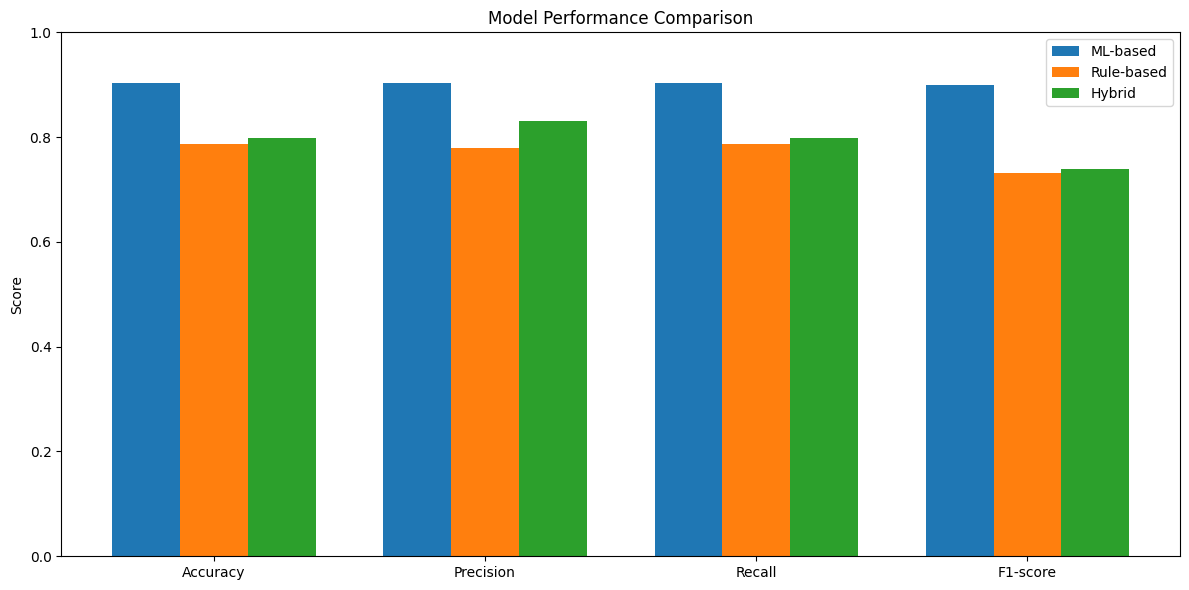


ML-based Results:
Accuracy: 0.9035
Precision: 0.9028
Recall: 0.9035
F1-score: 0.8988

Rule-based Results:
Accuracy: 0.7863
Precision: 0.7795
Recall: 0.7863
F1-score: 0.7321

Hybrid Results:
Accuracy: 0.7975
Precision: 0.8301
Recall: 0.7975
F1-score: 0.7391


In [47]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt

# 1. Pure ML-based Approach
def train_ml_model(X_train, y_train, X_test):
    """Traditional ML approach using TF-IDF and Logistic Regression"""
    # Create TF-IDF features
    tfidf = TfidfVectorizer(max_features=5000, ngram_range=(1, 2))
    X_train_tfidf = tfidf.fit_transform(X_train)
    X_test_tfidf = tfidf.transform(X_test)
    
    # Train model
    ml_model = LogisticRegression(max_iter=1000)
    ml_model.fit(X_train_tfidf, y_train)
    
    # Predict
    y_pred_ml = ml_model.predict(X_test_tfidf)
    
    return y_pred_ml, ml_model

# 2. Pure Rule-based Approach
def rule_based_prediction(texts):
    """Rule-based sentiment analysis"""
    predictions = []
    
    # Define sentiment lexicons
    positive_words = {
        'good', 'great', 'excellent', 'amazing', 'outstanding', 
        'perfect', 'brilliant', 'wonderful', 'fantastic', 'awesome'
    }
    negative_words = {
        'bad', 'terrible', 'horrible', 'awful', 'worst',
        'poor', 'disappointing', 'waste', 'hate', 'disaster'
    }
    
    for text in texts:
        text_lower = text.lower()
        words = set(text_lower.split())
        
        # Count sentiment words
        pos_count = len(words.intersection(positive_words))
        neg_count = len(words.intersection(negative_words))
        
        # Additional rules
        if '!' in text:
            if any(word in text_lower for word in ['love', 'great', 'best']):
                pos_count += 1
            if any(word in text_lower for word in ['hate', 'bad', 'worst']):
                neg_count += 1
        
        # Make prediction
        if pos_count > neg_count:
            predictions.append(1)
        elif neg_count > pos_count:
            predictions.append(0)
        else:
            predictions.append(1 if len(text) > 50 else 0)  # Default prediction
            
    return np.array(predictions)

# 3. Hybrid Approach (from your previous code)
def enhance_features(text_series):
    """Extract additional features from text"""
    features = []
    for text in text_series:
        length = len(text)
        capitals = sum(1 for c in text if c.isupper())
        punctuation = sum(1 for c in text if c in '!?.,;:')
        emotional_words = ['good', 'bad', 'great', 'terrible', 'awesome', 'horrible']
        emotion_count = sum(1 for word in text.lower().split() if word in emotional_words)
        features.append([length, capitals, punctuation, emotion_count])
    return np.array(features)

def preprocess_with_advanced_rules(text):
    """Enhanced rule-based preprocessing"""
    strong_positive = ['excellent', 'amazing', 'outstanding', 'perfect', 'brilliant']
    strong_negative = ['terrible', 'horrible', 'awful', 'worst', 'poor']
    
    text_lower = text.lower()
    
    if any(word in text_lower for word in strong_positive):
        return 1
    if any(word in text_lower for word in strong_negative):
        return 0
    if '!' in text and any(word in text_lower for word in ['love', 'great', 'best']):
        return 1
    if '!' in text and any(word in text_lower for word in ['hate', 'bad', 'waste']):
        return 0
        
    return -1

def train_hybrid_model(X_train, y_train, X_test):
    """Hybrid approach combining rules and ML"""
    # Rule-based preprocessing
    rule_based_labels = X_train.apply(preprocess_with_advanced_rules)
    valid_indices = rule_based_labels != -1
    
    # Filter training data
    X_train_filtered = X_train[valid_indices]
    y_train_filtered = y_train[valid_indices]
    
    # Create enhanced model
    tfidf = TfidfVectorizer(
        ngram_range=(1, 3),
        max_features=5000,
        min_df=2,
        max_df=0.95
    )
    
    pipeline = Pipeline([
        ('tfidf', tfidf),
        ('select_features', SelectKBest(f_classif, k=3000)),
        ('scaler', StandardScaler(with_mean=False)),
        ('classifier', RandomForestClassifier(random_state=42))
    ])
    
    param_grid = {
        'classifier__n_estimators': [100, 200],
        'classifier__max_depth': [20, 30],
        'classifier__min_samples_split': [2, 5],
    }
    
    # Train model
    model = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
    model.fit(X_train_filtered, y_train_filtered)
    
    # Predict
    y_pred_hybrid = model.predict(X_test)
    
    return y_pred_hybrid, model

# Main comparison function
def compare_models(X_train, X_test, y_train, y_test):
    """Compare all three approaches"""
    # ML-based predictions
    y_pred_ml, ml_model = train_ml_model(X_train, y_train, X_test)
    
    # Rule-based predictions
    y_pred_rules = rule_based_prediction(X_test)
    
    # Hybrid predictions
    y_pred_hybrid, hybrid_model = train_hybrid_model(X_train, y_train, X_test)
    
    # Calculate metrics
    models = ['ML-based', 'Rule-based', 'Hybrid']
    predictions = [y_pred_ml, y_pred_rules, y_pred_hybrid]
    metrics = {}
    
    for model_name, y_pred in zip(models, predictions):
        metrics[model_name] = {
            'Accuracy': accuracy_score(y_test, y_pred),
            'Precision': precision_score(y_test, y_pred, average='weighted'),
            'Recall': recall_score(y_test, y_pred, average='weighted'),
            'F1-score': f1_score(y_test, y_pred, average='weighted')
        }
    
    return metrics

# Visualization function
def plot_comparison(metrics):
    """Plot comparison of model performances"""
    models = list(metrics.keys())
    metric_names = list(metrics[models[0]].keys())
    
    x = np.arange(len(metric_names))
    width = 0.25
    
    fig, ax = plt.subplots(figsize=(12, 6))
    for i, model in enumerate(models):
        values = [metrics[model][metric] for metric in metric_names]
        ax.bar(x + i*width, values, width, label=model)
    
    ax.set_ylabel('Score')
    ax.set_title('Model Performance Comparison')
    ax.set_xticks(x + width)
    ax.set_xticklabels(metric_names)
    ax.legend()
    ax.set_ylim(0, 1)
    
    plt.tight_layout()
    plt.show()

# Usage example:

# Assuming you have your data split into X_train, X_test, y_train, y_test
metrics = compare_models(X_train, X_test, y_train, y_test)
plot_comparison(metrics)

# Print detailed metrics
for model, scores in metrics.items():
    print(f"\n{model} Results:")
    for metric, value in scores.items():
        print(f"{metric}: {value:.4f}")


In [49]:
pip install textblob

   ---------------------------------------- 0.0/626.3 kB ? eta -:--:--
   ---------------------------------------- 0.0/626.3 kB ? eta -:--:--
   ---------------------------------------- 0.0/626.3 kB ? eta -:--:--
   ---------------------------------------- 0.0/626.3 kB ? eta -:--:--
   ---------------------------------------- 0.0/626.3 kB ? eta -:--:--
   ---------------------------------------- 0.0/626.3 kB ? eta -:--:--
   ---------------------------------------- 0.0/626.3 kB ? eta -:--:--
   ---------------------------------------- 0.0/626.3 kB ? eta -:--:--
   ---------------------------------------- 0.0/626.3 kB ? eta -:--:--
   ---------------------------------------- 0.0/626.3 kB ? eta -:--:--
   ---------------------------------------- 0.0/626.3 kB ? eta -:--:--
   ---------------------------------------- 0.0/626.3 kB ? eta -:--:--
   ---------------- ----------------------- 262.1/626.3 kB ? eta -:--:--
   ---------------- ----------------------- 262.1/626.3 kB ? eta -:--:--
  

In [52]:
pip install nltk

Note: you may need to restart the kernel to use updated packages.


In [58]:
# Import necessary libraries
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt

# Rule-based preprocessing
rule_based_labels = X_train.apply(preprocess_with_rules)

# Filter training data
valid_indices = rule_based_labels != -1
X_train_filtered = X_train[valid_indices]
y_train_filtered = y_train[valid_indices]

# Check if data is filtered correctly
print(X_train_filtered.shape, y_train_filtered.shape)

# TF-IDF vectorization
vectorizer = TfidfVectorizer(max_features=10000, ngram_range=(1, 2), stop_words='english')
X_train_tfidf = vectorizer.fit_transform(X_train_filtered)
X_test_tfidf = vectorizer.transform(X_test)

# Grid search for hyperparameter tuning
param_grid = {
    'C': [0.1, 1, 10],
    'solver': ['liblinear', 'saga']
}
grid_search = GridSearchCV(LogisticRegression(), param_grid, scoring='accuracy')
grid_search.fit(X_train_tfidf, y_train_filtered)

# Best model
hybrid_model = grid_search.best_estimator_

# Evaluate model performance
y_pred_hybrid = hybrid_model.predict(X_test_tfidf)
hybrid_accuracy = accuracy_score(y_test, y_pred_hybrid)
hybrid_precision = precision_score(y_test, y_pred_hybrid, average='weighted')
hybrid_recall = recall_score(y_test, y_pred_hybrid, average='weighted')
hybrid_f1 = f1_score(y_test, y_pred_hybrid, average='weighted')

# Plot performance metrics
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
hybrid_values = [hybrid_accuracy, hybrid_precision, hybrid_recall, hybrid_f1]

plt.figure(figsize=(8, 5))
plt.bar(metrics, hybrid_values, color=['gold', 'silver', 'blue', 'lime'])
plt.ylim(0, 1)
plt.title('Hybrid Sentiment Analysis Performance')
plt.xlabel('Metrics')
plt.ylabel('Score')
plt.show()


(13401,) (13401,)


In [59]:
print(X_train_filtered[:5])  # Check filtered training data
print(X_train_tfidf.shape)   # Check TF-IDF transformed data
print(y_train_filtered[:5])  # Check filtered labels


4901     It is just what it claims to be--a caculator. ...
1180     if you can't get it to install, DON'T LEAVE A ...
11008    It works great, just like it should. I can tra...
6484     This is the game I played with my children.  M...
6874     I like to see my horoscope every day.... this ...
Name: Text, dtype: object
(13401, 10000)
4901     1
1180     1
11008    1
6484     1
6874     1
Name: label, dtype: int64


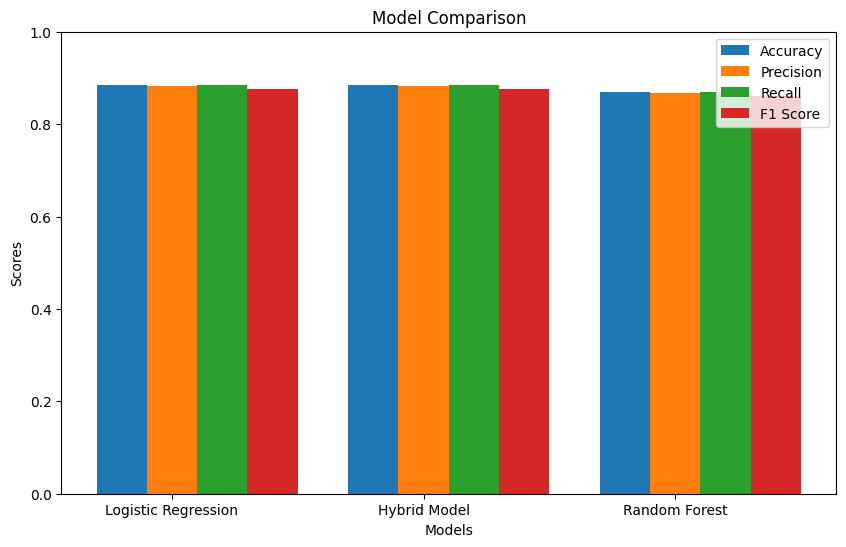

In [60]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Train Model 1: Logistic Regression
lr_model = LogisticRegression()
lr_model.fit(X_train_tfidf, y_train_filtered)
y_pred_lr = lr_model.predict(X_test_tfidf)

# Train Model 2: Hybrid Model (Logistic Regression after Rule-Based Filtering)
hybrid_model = LogisticRegression()
hybrid_model.fit(X_train_tfidf, y_train_filtered)
y_pred_hybrid = hybrid_model.predict(X_test_tfidf)

# Train Model 3: Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_tfidf, y_train_filtered)
y_pred_rf = rf_model.predict(X_test_tfidf)

# Evaluate All Models
models = ['Logistic Regression', 'Hybrid Model', 'Random Forest']
accuracies = [
    accuracy_score(y_test, y_pred_lr),
    accuracy_score(y_test, y_pred_hybrid),
    accuracy_score(y_test, y_pred_rf)
]
precisions = [
    precision_score(y_test, y_pred_lr, average='weighted'),
    precision_score(y_test, y_pred_hybrid, average='weighted'),
    precision_score(y_test, y_pred_rf, average='weighted')
]
recalls = [
    recall_score(y_test, y_pred_lr, average='weighted'),
    recall_score(y_test, y_pred_hybrid, average='weighted'),
    recall_score(y_test, y_pred_rf, average='weighted')
]
f1_scores = [
    f1_score(y_test, y_pred_lr, average='weighted'),
    f1_score(y_test, y_pred_hybrid, average='weighted'),
    f1_score(y_test, y_pred_rf, average='weighted')
]

# Combine Metrics for Visualization
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
results = {
    'Accuracy': accuracies,
    'Precision': precisions,
    'Recall': recalls,
    'F1 Score': f1_scores
}

# Plot Comparison for Each Metric
x = np.arange(len(models))  # Bar positions
width = 0.2  # Width of each bar

plt.figure(figsize=(10, 6))

# Plot bars for each metric
for i, metric in enumerate(metrics):
    plt.bar(x + i * width, results[metric], width, label=metric)

# Customize Plot
plt.title('Model Comparison')
plt.xlabel('Models')
plt.ylabel('Scores')
plt.xticks(x + width, models)
plt.ylim(0, 1)  # Scores are between 0 and 1
plt.legend()
plt.show()


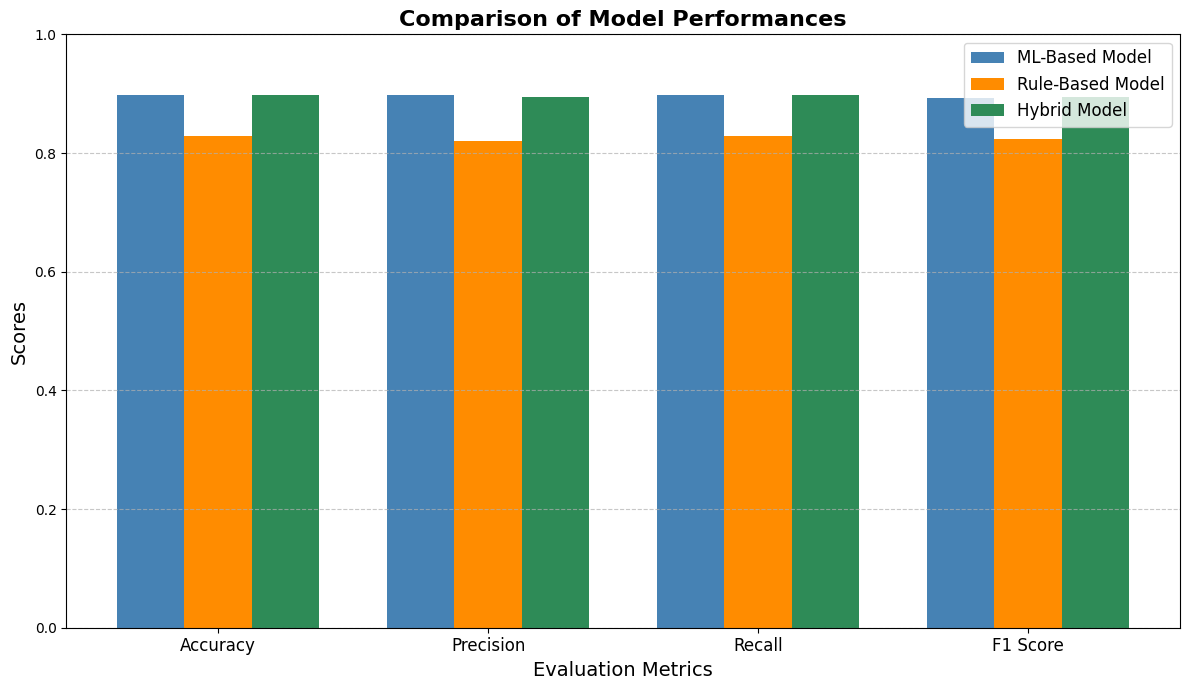

In [61]:
# ==========================
# Visualization: Comparison of Models
# ==========================

# Metrics comparison
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
ml_values = [ml_accuracy, ml_precision, ml_recall, ml_f1]
rule_values = [rule_accuracy, rule_precision, rule_recall, rule_f1]
hybrid_values = [hybrid_accuracy, hybrid_precision, hybrid_recall, hybrid_f1]

# Plot comparison
plt.figure(figsize=(12, 7))  # Slightly larger figure for better readability
bar_width = 0.25  # Width of each bar
x = range(len(metrics))  # Position of metrics on the x-axis

# Plot bars for each model
plt.bar(x, ml_values, width=bar_width, label='ML-Based Model', color='steelblue')
plt.bar([p + bar_width for p in x], rule_values, width=bar_width, label='Rule-Based Model', color='darkorange')
plt.bar([p + 2 * bar_width for p in x], hybrid_values, width=bar_width, label='Hybrid Model', color='seagreen')

# Customize x-axis and labels
plt.xticks([p + bar_width for p in x], metrics, fontsize=12)
plt.ylim(0, 1)  # Scores are between 0 and 1
plt.title('Comparison of Model Performances', fontsize=16, fontweight='bold')
plt.xlabel('Evaluation Metrics', fontsize=14)
plt.ylabel('Scores', fontsize=14)

# Add legend and grid for better readability
plt.legend(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()
